# SOC Estimation Using Neural Networks Documentation

Hammadi Jaiem

## Import Libraries and datasets

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report,accuracy_score,mean_squared_error


# Import the 10 Cycles

df1 = pd.read_csv('Cycle1.csv')
df2 = pd.read_csv('Cycle2.csv')
df3 = pd.read_csv('Cycle3.csv')
df4 = pd.read_csv('Cycle4.csv')

df5 = pd.read_csv('HWFTa.csv')
df6 = pd.read_csv('HWFTb.csv')
df7 = pd.read_csv('LA92.csv')
df8 = pd.read_csv('NN.csv')

df9 = pd.read_csv('UDDS.csv')
df10 = pd.read_csv('US06.csv')


# Combine data into one dataset.
raw_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df = raw_df

# Round Time to 0.1 step
df['Time'] = round(df['Time'],2)
## Calculate SOC from discharge
df['SOC'] =  1 + df['Ah']/ 2.7  # 2.7Ah is the rate capacity of the battery

print(df)

          Time  Voltage  Current  Battery_Temp_degC       Ah       SOC
0         0.00  4.14585 -1.81290          21.781981 -0.00000  1.000000
1         0.10  4.10532 -1.83249          21.781981 -0.00005  0.999981
2         0.20  4.08666 -1.85046          21.781981 -0.00010  0.999963
3         0.30  4.08087 -1.85781          21.781981 -0.00015  0.999944
4         0.40  4.07765 -1.86353          21.781981 -0.00021  0.999922
...        ...      ...      ...                ...      ...       ...
48056  4818.57  3.34114  0.00000          29.172490 -2.58596  0.042237
48057  4818.66  3.34114  0.00000          29.194910 -2.58596  0.042237
48058  4818.77  3.34114  0.00000          29.194910 -2.58596  0.042237
48059  4818.87  3.34114  0.00000          28.993160 -2.58596  0.042237
48060  4818.87  3.34114  0.00000          28.993160 -2.58596  0.042237

[1126083 rows x 6 columns]


## Plot Data

In [12]:
def opt(df):  # Create function opt to add SOC individually
    df['Time'] = round(df['Time'],2)
    df['SOC'] =  1 + df['Ah']/ 2.7
    return df

In [13]:
## Adding SOC
opt(df1)
opt(df2)
opt(df3)
opt(df4)
opt(df5)
opt(df6)
opt(df7)
opt(df8)
opt(df9)
opt(df10)


,Time,Voltage,Current,Battery_Temp_degC,Ah,SOC
0,0.00,4.17802,-0.01062,25.61949,0.00000,1.000000
1,0.10,4.17673,-0.04981,25.61949,-0.00000,1.000000
2,0.20,4.17609,-0.06615,25.61949,-0.00000,1.000000
3,0.30,4.17609,-0.06941,25.61949,-0.00000,1.000000
4,0.40,4.17544,-0.07105,25.61949,-0.00001,0.999996
...,...,...,...,...,...,...
48056,4818.57,3.34114,0.00000,29.17249,-2.58596,0.042237
48057,4818.66,3.34114,0.00000,29.19491,-2.58596,0.042237
48058,4818.77,3.34114,0.00000,29.19491,-2.58596,0.042237
48059,4818.87,3.34114,0.00000,28.99316,-2.58596,0.042237


### Plot SOC 

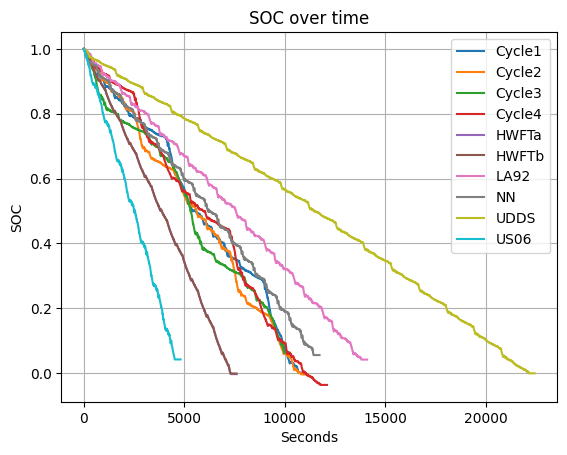

In [14]:
def plot(df,label):
    plt.plot(df['Time'], df['SOC'], label = label)
    
plot(df1,"Cycle1")
plot(df2,"Cycle2")
plot(df3,"Cycle3")
plot(df4,"Cycle4")

plot(df5,"HWFTa")
plot(df6,"HWFTb")
plot(df7,"LA92")
plot(df8,"NN")

plot(df9,"UDDS")
plot(df10,"US06")

plt.title("SOC over time")
plt.xlabel("Seconds")
plt.ylabel("SOC")
plt.grid()

plt.legend()
plt.show()

### Plot Voltage over time

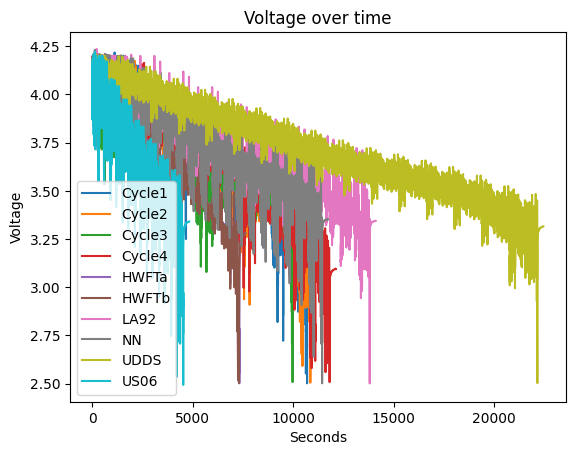

In [7]:
def plot(df,label):
    plt.plot(df['Time'], df['Voltage'], label = label)

plot(df1,"Cycle1")
plot(df2,"Cycle2")
plot(df3,"Cycle3")
plot(df4,"Cycle4")

plot(df5,"HWFTa")
plot(df6,"HWFTb")
plot(df7,"LA92")
plot(df8,"NN")

plot(df9,"UDDS")
plot(df10,"US06")

plt.title("Voltage over time")
plt.xlabel("Seconds")
plt.ylabel("Voltage")

plt.legend()
plt.show()

### Plot Voltage vs SOC

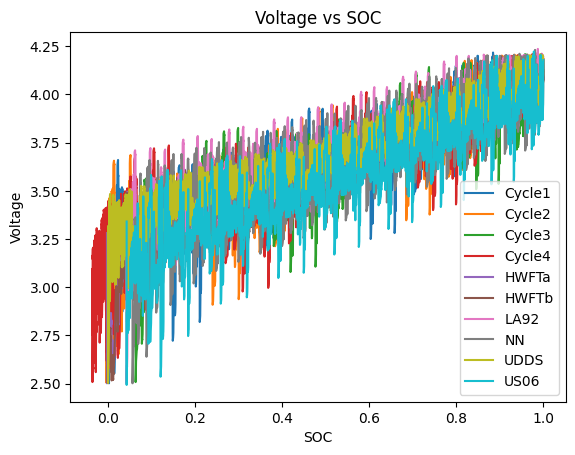

In [8]:
def plot(df,label):
    plt.plot(df['SOC'], df['Voltage'], label = label)

plot(df1,"Cycle1")
plot(df2,"Cycle2")
plot(df3,"Cycle3")
plot(df4,"Cycle4")

plot(df5,"HWFTa")
plot(df6,"HWFTb")
plot(df7,"LA92")
plot(df8,"NN")

plot(df9,"UDDS")
plot(df10,"US06")

plt.title("Voltage vs SOC")
plt.xlabel("SOC")
plt.ylabel("Voltage")

plt.legend()
plt.show()

### Plot Battery Temperature over time

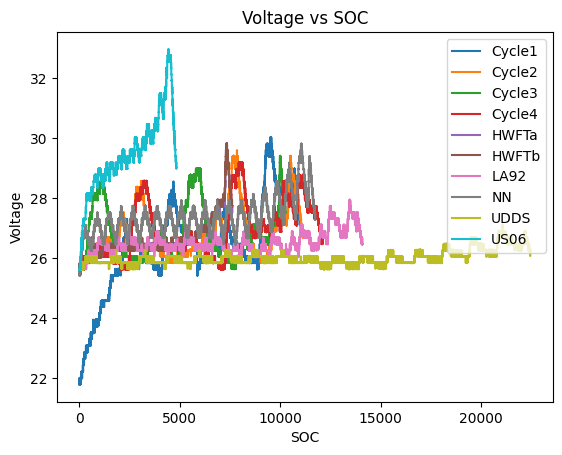

In [17]:
def plot(df,label):
    plt.plot(df['Time'], df['Battery_Temp_degC'], label = label)

plot(df1,"Cycle1")
plot(df2,"Cycle2")
plot(df3,"Cycle3")
plot(df4,"Cycle4")

plot(df5,"HWFTa")
plot(df6,"HWFTb")
plot(df7,"LA92")
plot(df8,"NN")

plot(df9,"UDDS")
plot(df10,"US06")

plt.title("Voltage vs SOC")
plt.xlabel("SOC")
plt.ylabel("Voltage")

plt.legend()
plt.show()

# Neural Network 

## Neural Network with 3 inputs (not scaled)

In [3]:
data1 = df.to_numpy() # Convert pandas to numpy
# 1: Voltage, 2: Current 3: Temperature
X = data1[:,1:4] #seperating inputs from outputs X contains Voltage and Current
Y = data1[:,5] # Output SOC

### Split data to 2/3 training and 1/3 testing

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [27]:
model = Sequential()
model.add(Dense(48, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1))
model.compile(loss="MeanSquaredError", optimizer='Adam',
	metrics=["MeanSquaredError"])

### Train model

In [9]:
history1 = model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
23578/23578 [==============================] - 23s 975us/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 2/10
23578/23578 [==============================] - 26s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3/10
23578/23578 [==============================] - 25s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4/10
23578/23578 [==============================] - 25s 1ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 5/10
23578/23578 [==============================] - 24s 1ms/step - loss: 9.0457e-04 - mean_squared_error: 9.0457e-04
Epoch 6/10
23578/23578 [==============================] - 25s 1ms/step - loss: 8.2258e-04 - mean_squared_error: 8.2258e-04
Epoch 7/10
23578/23578 [==============================] - 25s 1ms/step - loss: 7.8423e-04 - mean_squared_error: 7.8423e-04
Epoch 8/10
23578/23578 [==============================] - 25s 1ms/step - loss: 7.5178e-04 - mean_squared_error: 7.5178e-04
Epoch 9/10
23578/23578 [======================

### Save model

In [10]:
model.save('unscaled_3_input_nn')

INFO:tensorflow:Assets written to: unscaled_3_input_nn/assets


### Predict SOC

In [41]:
y_pred = model.predict(X[:])

35191/35191 [==============================] - 23s 639us/step


### Compare predicted SOC with real SOC

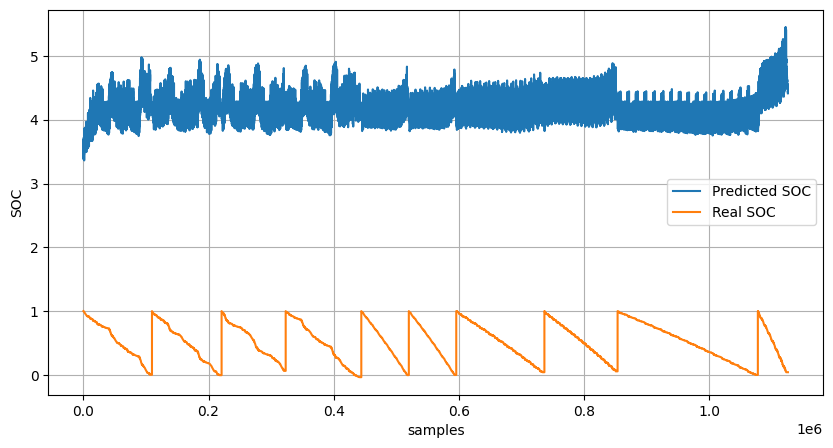

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred)
plt.plot(Y)
plt.legend(['Predicted SOC','Real SOC'])
plt.ylabel('SOC')
plt.xlabel('samples')
plt.grid()
plt.show()

### Losss function

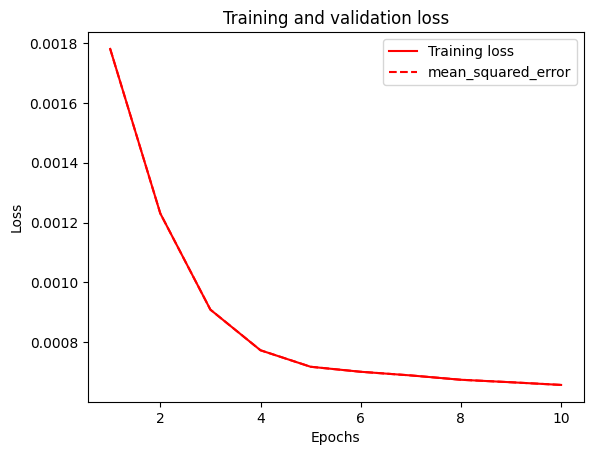

In [16]:
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["mean_squared_error"]
epochs = range(1, len(loss_values) + 1)
plt.figure(1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "r--", label="mean_squared_error")
plt.title("Training and mean_squared_error for model 1")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Data scaling and splitting 

In [3]:
data1 = df.to_numpy()
# 1: Voltage, 2: Current 3: Temperature
# Scaling:
V = (data1[:,1]-min(data1[:,1]))/(max(data1[:,1])-min(data1[:,1]))
I = (data1[:,2]-min(data1[:,2]))/(max(data1[:,2])-min(data1[:,2]))
T = (data1[:,3]-min(data1[:,3]))/(max(data1[:,3])-min(data1[:,3]))
X = np.column_stack((V,I,T))

Y = data1[:,5] # Output SOC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [18]:
X_train.shape

(754475, 3)

In [20]:
Y_test.shape

(371608,)

## Neural Network with 3 inputs (scaled)

### Create a new model

In [9]:
model2 = Sequential()
model2.add(Dense(10, activation="relu")) # 1st hidden layer
model2.add(Dense(10, activation="relu")) # 2nd hiddent layer
model2.add(Dense(5, activation="relu")) # 3rd hiddent layer
model2.add(Dense(1))
model2.compile(loss="MeanSquaredError", optimizer='Adam',
	metrics=["MeanSquaredError"])

history2 = model2.fit(X_train,Y_train,epochs=15)


Epoch 1/15
23578/23578 [==============================] - 24s 983us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2/15
23578/23578 [==============================] - 24s 997us/step - loss: 5.6476e-04 - mean_squared_error: 5.6476e-04
Epoch 3/15
23578/23578 [==============================] - 24s 1ms/step - loss: 5.3007e-04 - mean_squared_error: 5.3007e-04
Epoch 4/15
23578/23578 [==============================] - 25s 1ms/step - loss: 5.1045e-04 - mean_squared_error: 5.1045e-04
Epoch 5/15
23578/23578 [==============================] - 24s 1ms/step - loss: 5.0428e-04 - mean_squared_error: 5.0428e-04
Epoch 6/15
23578/23578 [==============================] - 24s 1ms/step - loss: 4.9995e-04 - mean_squared_error: 4.9995e-04
Epoch 7/15
23578/23578 [==============================] - 25s 1ms/step - loss: 4.9634e-04 - mean_squared_error: 4.9634e-04
Epoch 8/15
23578/23578 [==============================] - 24s 1ms/step - loss: 4.9124e-04 - mean_squared_error: 4.9124e-04
Epoch 9/15
23578/235

In [10]:
results = model2.evaluate(X_test, Y_test, batch_size=4)
print("test loss, test acc:", results)


92902/92902 [==============================] - 69s 741us/step - loss: 5.3281e-04 - mean_squared_error: 5.3281e-04
test loss, test acc: [0.0005328099941834807, 0.0005328099941834807]


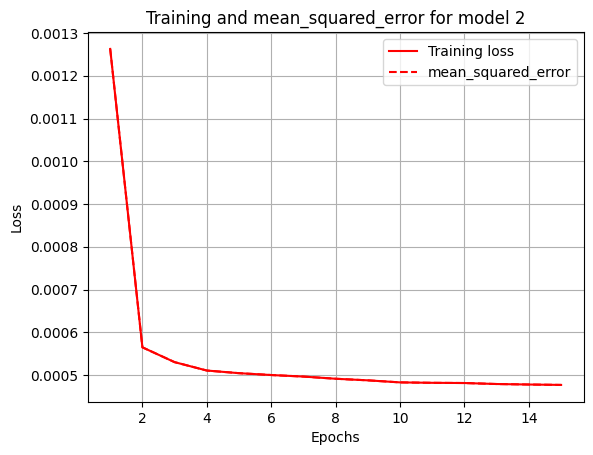

In [18]:
history_dict = history2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["mean_squared_error"]
epochs = range(1, len(loss_values) + 1)
plt.figure(1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "r--", label="mean_squared_error")
plt.title("Training and mean_squared_error for model 2")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [20]:
y_pred = model2.predict(X)

35191/35191 [==============================] - 25s 694us/step


### Compare Predicted SOC to Real SOC

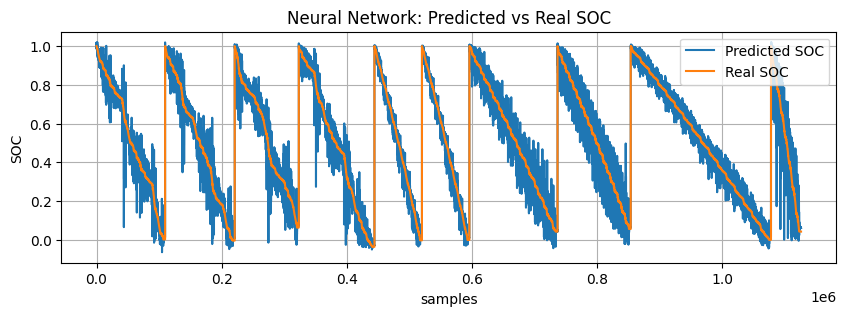

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(y_pred)
plt.plot(Y)
plt.legend(['Predicted SOC','Real SOC'])
plt.ylabel('SOC')
plt.xlabel('samples')
plt.title('Neural Network: Predicted vs Real SOC')
plt.grid()
plt.show()

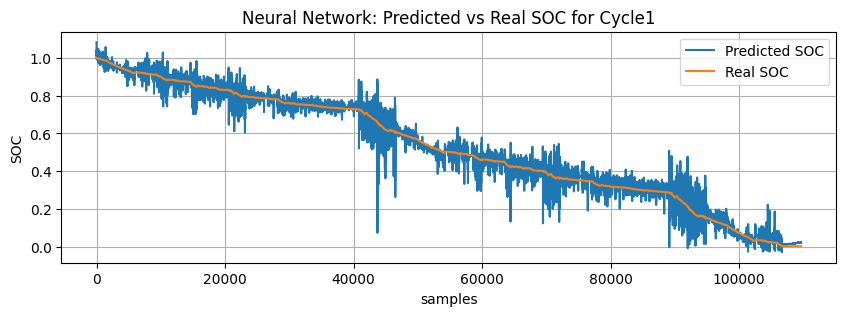

In [32]:
plt.figure(figsize=(10, 3))
plt.plot(y_pred[0:len(df1)])
plt.plot(Y[0:len(df1)])
plt.legend(['Predicted SOC','Real SOC'])
plt.ylabel('SOC')
plt.xlabel('samples')
plt.title('Neural Network: Predicted vs Real SOC for Cycle1')
plt.grid()
plt.show()

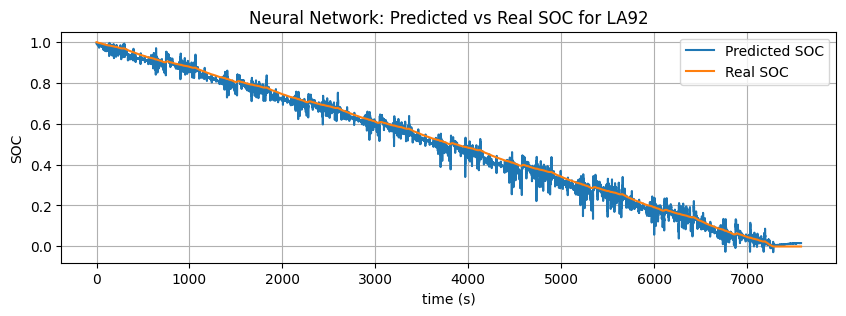

In [72]:
i = len(df1)+len(df2)+len(df3)+len(df4)+len(df5)
t = np.arange(i,i+len(df6)/10,1/10)-i
plt.figure(figsize=(10, 3))
plt.plot(t,y_pred[i:i+len(df6)])
plt.plot(t,Y[i:i+len(df6)])
plt.legend(['Predicted SOC','Real SOC'])
plt.ylabel('SOC')
plt.xlabel('time (s)')
plt.title('Neural Network: Predicted vs Real SOC for LA92')
plt.grid()
plt.show()

# Random Forest

In [3]:
RandomForest = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=200)

from sklearn.metrics import classification_report,accuracy_score,mean_squared_error

RandomForest.fit(X,Y)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [4]:
y_pred1  = RandomForest.predict(X)
mse = mean_squared_error(Y,y_pred1)
print(f'mse  {mse} ')

mse  2.3947291088402564e-05 


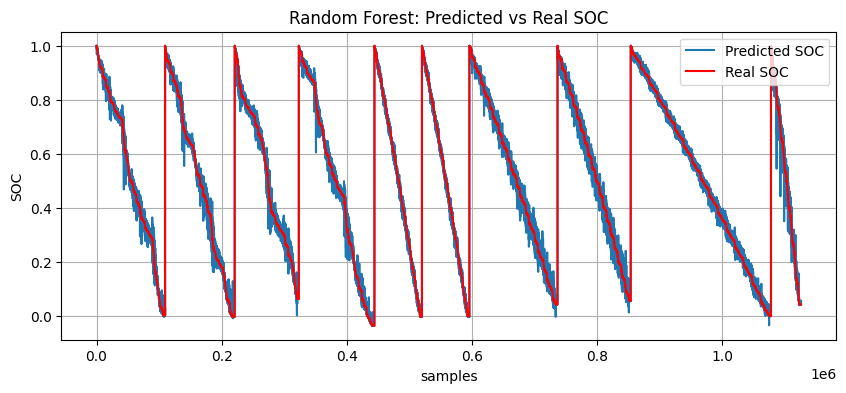

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(y_pred1)
plt.plot(Y,'r')
plt.legend(['Predicted SOC','Real SOC'])
plt.ylabel('SOC')
plt.xlabel('samples')
plt.title('Random Forest: Predicted vs Real SOC')
plt.grid()
plt.show()

In [ ]:
RandomForest = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=200)

from sklearn.metrics import classification_report,accuracy_score,mean_squared_error

RandomForest.fit(X_train,Y_train)
y_pred1  = RandomForest.predict(X)
mse = mean_squared_error(Y,y_pred1)
print(f'mse  {mse} ')

## Linear Regression

In [32]:
lgr = LinearRegression()
lgr.fit(X,Y)
y_pred  = lgr.predict(X)
mse = mean_squared_error(Y,y_pred)
print(f'mse_lgr {mse} ')

mse_lgr 0.0025418983424761316 


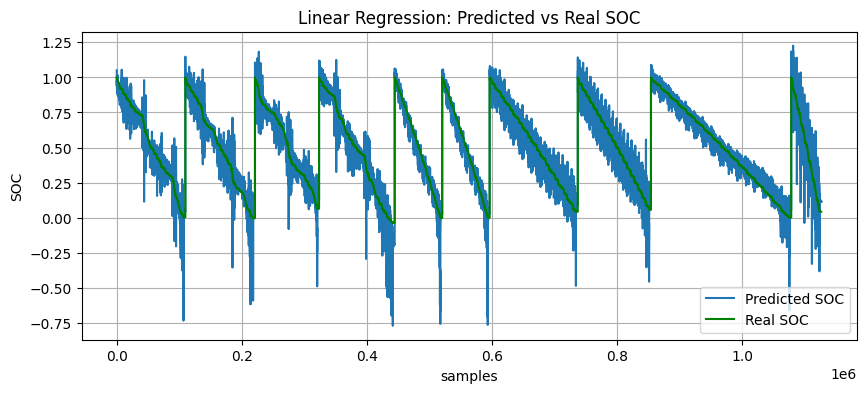

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(y_pred)
plt.plot(Y,'g')
plt.legend(['Predicted SOC','Real SOC'])
plt.ylabel('SOC')
plt.xlabel('samples')
plt.title('Linear Regression: Predicted vs Real SOC')
plt.grid()
plt.show()